# Problem Statement:

In this, we have to predict positive and negative reviews based on sentiments by using different classification models. 

In [58]:

#IMPORTING LIBRARIES AND TOOLS

import pandas as pd
from wordcloud import WordCloud
from textblob import TextBlob
import pandas_profiling as pp
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
nltk.download('words')
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\GRD\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [83]:
#Loading our CSV file

df=pd.read_csv("IMDB dataset.csv")

# Data Preparation

In [84]:
df.shape

(50000, 2)

In [85]:
df.info

<bound method DataFrame.info of                                                   review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]>

In [86]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [87]:
df.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [88]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,negative
freq,5,25000


In [89]:
df['sentiment'].value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

# Data Preprocessing

In [90]:
#REMOVING HTML STRIPS ,NOISY TEXTS AND SPECIAL CHARACTERS
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

def remove_splchr(text):    
    text=re.sub(r'[^a-zA-Z0-9\s]',' ',text)
    return text
    
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_splchr(text)
    return text   
df['review']=df['review'].apply(denoise_text)
df.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there s a family where a little boy ...,negative
4,Petter Mattei s Love in the Time of Money is...,positive


In [91]:
# words=set(nltk.corpus.words.words())
# def rem_meaningless(text):
#     word_tokens=word_tokenize(text)
#     word_tokens=[t.strip() for t in word_tokens]
#     filtered=[w for w in nltk.wordpunkt_tokenize(text) if w.lower() in words or not w.isalpha()]
#     text=' '.join(filtered)
#     return text
# df['review']=df['review'].apply(rem_meaningless)
# df.head(5)

In [92]:
# def sim_lemma(text):
#     lz=WordNetLemmatizer()
#     text=' '.join([lz.lemmatize(word) for word in text.split()])
#     return text

# df['review']=df['review'].apply(sim_stem)
# df.head(5)    

REMOVING STOPWORDS

In [93]:
st_words=set(stopwords.words('english'))
st_words.update(['film','movie','one','also','still','however','become'])
def rem_stopwrds(text):
    word_tokens=word_tokenize(text)
    word_tokens=[t.strip() for t in word_tokens]
    filtered=[w for w in word_tokens if w.lower() not in st_words]
    text=' '.join(filtered)
    return text
df['review']=df['review'].apply(rem_stopwrds)
df.head(5)

,review,sentiment
0,reviewers mentioned watching 1 Oz episode hook...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,Basically family little boy Jake thinks zombie...,negative
4,Petter Mattei Love Time Money visually stunnin...,positive


# Unsupervised approach

In [94]:
x=df['review']
y=df['sentiment']

In [101]:
df=df.drop('sentiment',axis=1)

#Applying lexicons for finding polarity of texts

In [102]:
#using TextBlob lexicon
def sentiment(text):
    senti =TextBlob(text)
    return senti.sentiment

df['polarity']=df['review'].apply(sentiment).apply(lambda x: x[0])
# df['subjectivity']=df['review'].apply(sentiment).apply(lambda x: x[1])

df.head(10)

,review,polarity,pd_sentiment
0,reviewers mentioned watching 1 Oz episode hook...,0.041946,positive
1,wonderful little production filming technique ...,0.125980,positive
2,thought wonderful way spend time hot summer we...,0.285317,positive
3,Basically family little boy Jake thinks zombie...,0.001389,negative
4,Petter Mattei Love Time Money visually stunnin...,0.224719,positive
5,Probably time favorite story selflessness sacr...,0.045455,positive
6,sure would like see resurrection dated Seahunt...,0.207744,positive
7,show amazing fresh innovative idea 70 first ai...,0.118561,positive
8,Encouraged positive comments looking forward w...,-0.217626,negative
9,like original gut wrenching laughter like youn...,0.412500,positive


In [103]:
# creating predicted sentiment column
def categories(pol):
    if pol>0.01:
        return 'positive'
    else:
        return 'negative'
    
df['pd_sentiment']=df['polarity'].apply(categories)
df.head(10)

,review,polarity,pd_sentiment
0,reviewers mentioned watching 1 Oz episode hook...,0.041946,positive
1,wonderful little production filming technique ...,0.125980,positive
2,thought wonderful way spend time hot summer we...,0.285317,positive
3,Basically family little boy Jake thinks zombie...,0.001389,negative
4,Petter Mattei Love Time Money visually stunnin...,0.224719,positive
5,Probably time favorite story selflessness sacr...,0.045455,positive
6,sure would like see resurrection dated Seahunt...,0.207744,positive
7,show amazing fresh innovative idea 70 first ai...,0.118561,positive
8,Encouraged positive comments looking forward w...,-0.217626,negative
9,like original gut wrenching laughter like youn...,0.412500,positive


In [104]:
# sid=SentimentIntensityAnalyzer()
# def vadersenti(text):
#     senti =sid.polarity_scores(text)
#     return senti

# df['vader_pos']=df['review'].apply(vadersenti).apply(lambda x:x['pos'])
# df['vader_neu']=df['review'].apply(vadersenti).apply(lambda x:x['neu'])
# df['vader_neg']=df['review'].apply(vadersenti).apply(lambda x:x['neg'])
# # df['subjectivity']=df['review'].apply(sentiment).apply(lambda x: x[1])

# df.head(10)

In [106]:
#positive
pos_riv=df[df['pd_sentiment']=='positive']
pos_riv=pos_riv[pos_riv['polarity']>0.2]
print(pos_riv)

                                                  review  polarity  \
2      thought wonderful way spend time hot summer we...  0.285317   
4      Petter Mattei Love Time Money visually stunnin...  0.224719   
6      sure would like see resurrection dated Seahunt...  0.207744   
9      like original gut wrenching laughter like youn...  0.412500   
22     absolutely stunning 2 5 hrs kill watch regret ...  0.400000   
...                                                  ...       ...   
49985  Imaginary Heroes clearly best year complete ut...  0.350893   
49986  disgrace Major League Franchise live Minnesota...  0.222159   
49989  got weeks ago love modern light filled true co...  0.288566   
49993  Robert Colomb two full time jobs known through...  0.211800   
49995  thought right good job creative original first...  0.324669   

      pd_sentiment  
2         positive  
4         positive  
6         positive  
9         positive  
22        positive  
...            ...  
49985     po

In [107]:
pos_riv.drop('pd_sentiment',axis=1)

,review,polarity
2,thought wonderful way spend time hot summer we...,0.285317
4,Petter Mattei Love Time Money visually stunnin...,0.224719
6,sure would like see resurrection dated Seahunt...,0.207744
9,like original gut wrenching laughter like youn...,0.412500
22,absolutely stunning 2 5 hrs kill watch regret ...,0.400000
...,...,...
49985,Imaginary Heroes clearly best year complete ut...,0.350893
49986,disgrace Major League Franchise live Minnesota...,0.222159
49989,got weeks ago love modern light filled true co...,0.288566
49993,Robert Colomb two full time jobs known through...,0.211800


In [108]:
#negative
neg_riv=df[df['pd_sentiment']=='negative']
neg_riv=neg_riv[neg_riv['polarity']<0]
print(neg_riv)

                                                  review  polarity  \
8      Encouraged positive comments looking forward w... -0.217626   
17     made top 10 awful movies Horrible continuous m... -0.217391   
21     terrible misfortune view b entirety say save t... -0.176833   
23     First let get things straight anime fan always... -0.010455   
27     tried many things stinging political satire Ho... -0.014444   
...                                                  ...       ...   
49982  hones used like show watch regularly thank god... -0.026355   
49990  Lame lame lame 90 minute cringe fest 89 minute... -0.185965   
49994  typical junk comedy almost laughs genuine mome... -0.335938   
49996  Bad plot bad dialogue bad acting idiotic direc... -0.249405   
49998  going disagree previous comment side Maltin se... -0.042725   

      pd_sentiment  
8         negative  
17        negative  
21        negative  
23        negative  
27        negative  
...            ...  
49982     ne

In [109]:
neg_riv.drop('pd_sentiment',axis=1)

,review,polarity
8,Encouraged positive comments looking forward w...,-0.217626
17,made top 10 awful movies Horrible continuous m...,-0.217391
21,terrible misfortune view b entirety say save t...,-0.176833
23,First let get things straight anime fan always...,-0.010455
27,tried many things stinging political satire Ho...,-0.014444
...,...,...
49982,hones used like show watch regularly thank god...,-0.026355
49990,Lame lame lame 90 minute cringe fest 89 minute...,-0.185965
49994,typical junk comedy almost laughs genuine mome...,-0.335938
49996,Bad plot bad dialogue bad acting idiotic direc...,-0.249405


In [110]:
all_positive=" ".join(pos_riv['review'])

In [111]:
po_wcloud=WordCloud(width = 1000, height = 1000, 
                background_color ='white', 
                stopwords = st_words, 
                min_font_size = 10).generate(all_positive)

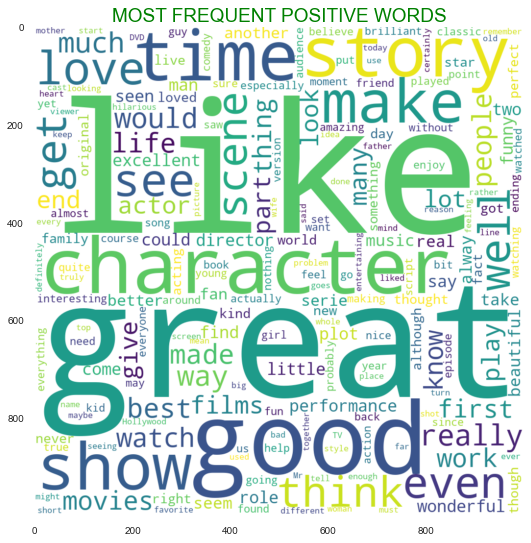

In [112]:
plt.figure(figsize=(12,9))
plt.title("MOST FREQUENT POSITIVE WORDS",fontdict={'color':"green",'fontsize':19})
plt.imshow(po_wcloud,interpolation='bilinear')
plt.show()

In [113]:
all_negative=" ".join(neg_riv['review'])

In [114]:
neg_wcloud=WordCloud(width = 1000, height = 1000, 
                background_color ='white', 
                stopwords = st_words, 
                min_font_size = 10).generate(all_negative)

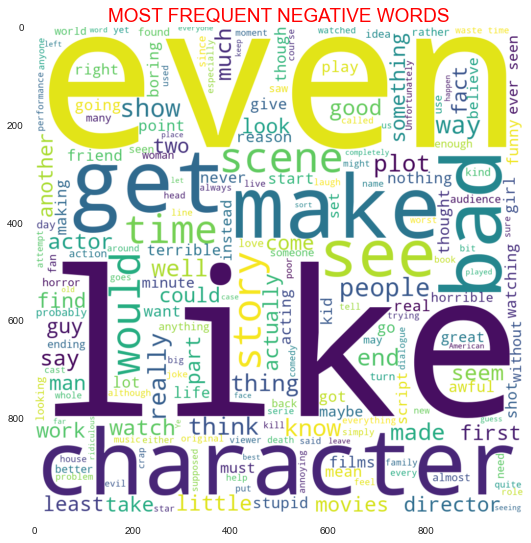

In [115]:
plt.figure(figsize=(12,9))
plt.title("MOST FREQUENT NEGATIVE WORDS",fontdict={'color':'red','fontsize':19})
plt.imshow(neg_wcloud,interpolation='bilinear')
plt.show()

In [116]:
#checking accuracy score for unsupervised learning model using leticons

print(accuracy_score(y,df['pd_sentiment']))

0.71224


# Supervised Approach

In [117]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Bag OF Words Model

In [ ]:
#Here we use Term frequency-inverse document frequency Vectorizer 

In [118]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [119]:
tfidvec=TfidfVectorizer(stop_words='english', max_df=0.7)

In [120]:
trainidf=tfidvec.fit_transform(X_train)
testidf=tfidvec.transform(X_test)
print(trainidf.shape)
print(y_train.shape)

(40000, 93645)
(40000,)


In [ ]:
#Using Multinomial Naive Bayes

In [121]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha=0.1)
clf.fit(trainidf,y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [122]:
predMulti=clf.predict(testidf)

In [123]:
print(accuracy_score(y_test,predMulti))

0.863


In [ ]:
#Using Linear Support Vector Classification

In [124]:
from sklearn.svm import LinearSVC
lsclass = LinearSVC(random_state=0, tol=1e-5)
lsclass.fit(trainidf,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)

In [125]:
linearpred=lsclass.predict(testidf)
print(accuracy_score(y_test,linearpred))

0.8866


# Conclusion

> We saw that Supervised learning has more accuracy than Unsupervised learning
> Linear SVC performed better than Multinomial NB